# <center> <h1>  🧑‍💻 

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,MaxPooling2D, Add, Input, Flatten, Conv2D, MaxPool2D, AveragePooling2D, Dropout, BatchNormalization, Activation
from tensorflow.keras import Model, Sequential
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np


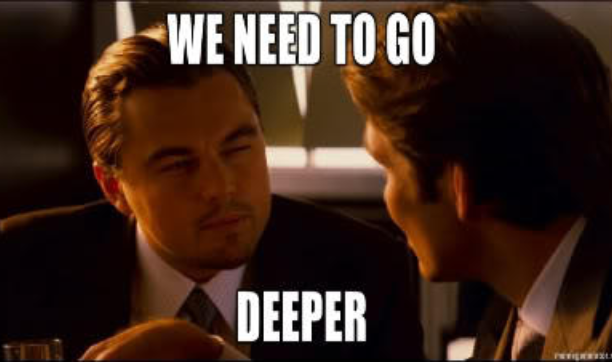

### ResNet are called residual networks. ResNet is a special type of convolutional neural network (CNN) used for tasks such as image recognition. ResNet was first introduced in 2015 by Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun in the paper "Deep Residual Learning for Image Recognition".

### We can also develop a different kind of ResNet ourselves depending on the depth of the neural network, such as ResNet-50 or ResNet-152. The number at the end of ResNet indicates the number of layers of the neural net, or how deep our neural net is. We can create a ResNet of any depth using the basic building blocks of ResNet.

### ResNet can be called an updated version of the VGG architecture, the difference between which is the skipped connections used in ResNets. In the figure below, we can see the VGG architecture as well as the 34-layer ResNet.

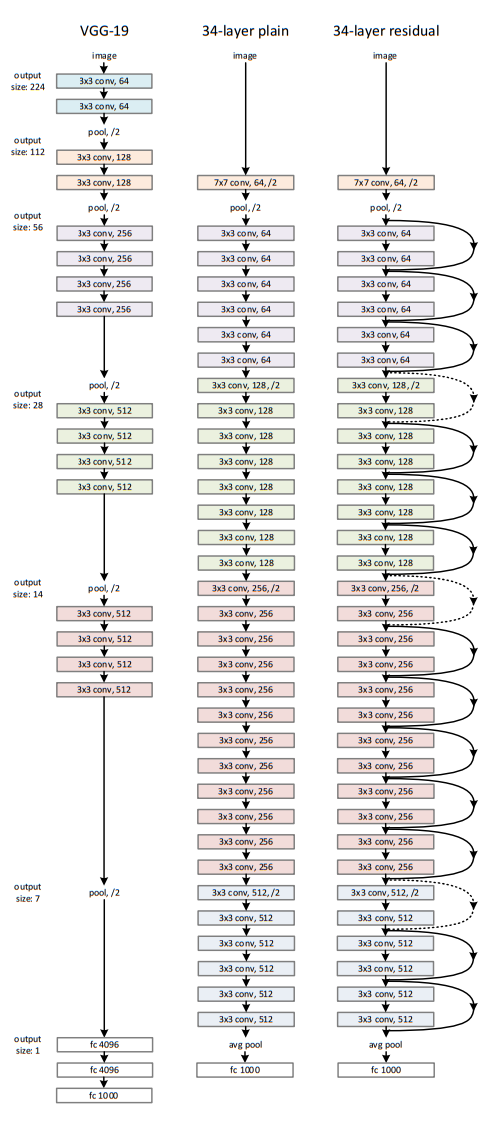

### Notice 3rd neural net 34 - looking at layer residual(ResNet has 34 layers) why we use skip connection, why do we need it? In previous CNN architectures, as more and more layers were added to the neural network, the performance of the model was observed to degrade, due to the vanishing gradient problem. As we go deeper into the network, the vanishing gradient problem becomes more and more important, and the solution to this problem was to use skip connection.

Looking at the image below we have 2 skip connections.

* 1 - Identity block

* 2 - Bottleneck / Convolutional block

--------

* 1 - The incoming value is saved in the Identity block and added after 2 convolution layers.

* 2 - In Bottleneck / Convolutional block, the input value is saved and this value passes through 1x1 conv layer and then added with the output value from 2 convolutional layers.


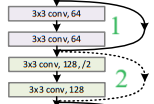

             1 - Identity block                                    2 - Bottleneck / Convolutional block

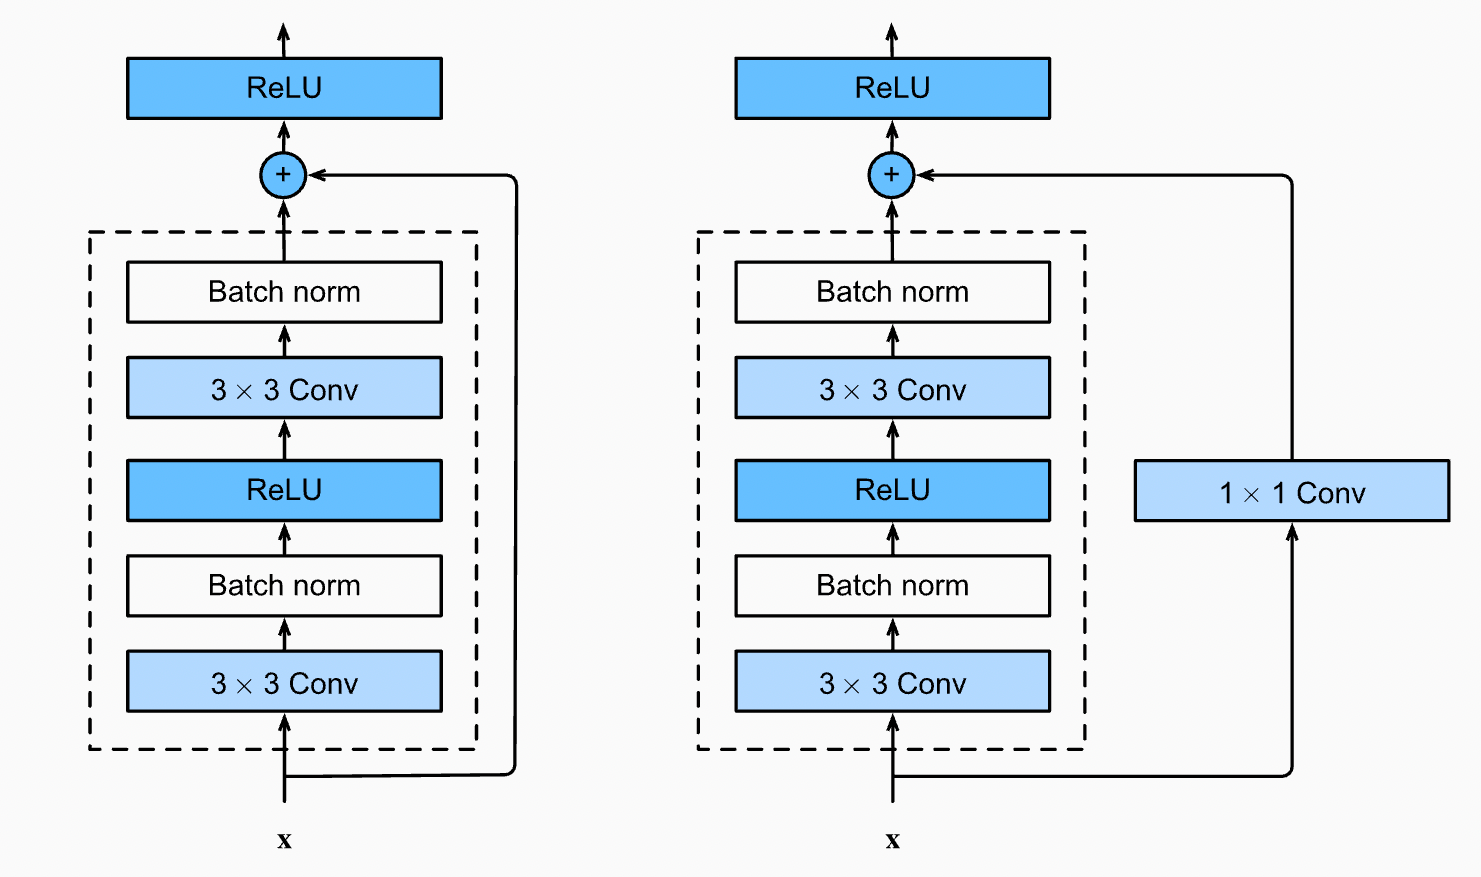




# <center> Input

In [11]:
input_layer = Input(shape=(224,224,3))

In [12]:
x = Conv2D(64, (7,7), strides=2, padding="same", activation="relu")(input_layer)

In [13]:
x = MaxPooling2D((3,3), strides=2, padding="same",)(x)

In [14]:
x_ = x

In [15]:
x.shape

TensorShape([None, 56, 56, 64])

# <center> 1 - Identity block

In [16]:
x = Conv2D(64, (3,3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(64, (3,3), padding="same")(x)
x = BatchNormalization()(x)

x = Add()([x,x_])
x_ = x

x = Activation("relu")(x)

# <center>  2 - Identity block

In [17]:
x = Conv2D(64, (3,3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(64, (3,3), padding="same")(x)
x = BatchNormalization()(x)

x = Add()([x,x_])
x_ = x

x = Activation("relu")(x)

# <center>  3 - Identity block

In [18]:
x = Conv2D(64, (3,3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(64, (3,3), padding="same")(x)
x = BatchNormalization()(x)

x = Add()([x,x_])
x_ = x

x = Activation("relu")(x)

In [19]:
x.shape

TensorShape([None, 56, 56, 64])

In [20]:
x_.shape

TensorShape([None, 56, 56, 64])

# <center>  1 - Bottleneck / Convolutional block

In [21]:
x = Conv2D(128, (3,3), strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(128, (3,3), padding="same")(x)
x = BatchNormalization()(x)

x_ = Conv2D(128, (1,1), strides=2, padding="same")(x_)

x = Add()([x,x_])
x_ = x

x = Activation("relu")(x)

In [22]:
x.shape

TensorShape([None, 28, 28, 128])

In [23]:
x_.shape

TensorShape([None, 28, 28, 128])

# <center>  4 - Identity block

In [24]:
x = Conv2D(128, (3,3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(128, (3,3), padding="same")(x)
x = BatchNormalization()(x)

x = Add()([x,x_])
x_ = x

x = Activation("relu")(x)

# <center>  5 - Identity block

In [25]:
x = Conv2D(128, (3,3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(128, (3,3), padding="same")(x)
x = BatchNormalization()(x)

x = Add()([x,x_])
x_ = x

x = Activation("relu")(x)

# <center>  6 - Identity block

In [26]:
x = Conv2D(128, (3,3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(128, (3,3), padding="same")(x)
x = BatchNormalization()(x)

x = Add()([x,x_])
x_ = x

x = Activation("relu")(x)

In [27]:
x.shape

TensorShape([None, 28, 28, 128])

In [28]:
x_.shape

TensorShape([None, 28, 28, 128])

# <center> 2 - Bottleneck / Convolutional block

In [29]:
x = Conv2D(256, (3,3), strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(256, (3,3), padding="same")(x)
x = BatchNormalization()(x)

x_ = Conv2D(256, (1,1), strides=2, padding="same")(x_)

x = Add()([x,x_])
x_ = x

x = Activation("relu")(x)

In [30]:
x.shape

TensorShape([None, 14, 14, 256])

In [31]:
x_.shape

TensorShape([None, 14, 14, 256])

# <center>  7 - Identity block

In [32]:
x = Conv2D(256, (3,3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(256, (3,3), padding="same")(x)
x = BatchNormalization()(x)

x = Add()([x,x_])
x_ = x

x = Activation("relu")(x)

# <center> 8 - Identity block

In [33]:
x = Conv2D(256, (3,3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(256, (3,3), padding="same")(x)
x = BatchNormalization()(x)

x = Add()([x,x_])
x_ = x

x = Activation("relu")(x)

# <center>  9 - Identity block

In [34]:
x = Conv2D(256, (3,3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(256, (3,3), padding="same")(x)
x = BatchNormalization()(x)

x = Add()([x,x_])
x_ = x

x = Activation("relu")(x)

# <center>  10 - Identity block

In [35]:
x = Conv2D(256, (3,3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(256, (3,3), padding="same")(x)
x = BatchNormalization()(x)

x = Add()([x,x_])
x_ = x

x = Activation("relu")(x)

# <center>  11 - Identity block

In [36]:
x = Conv2D(256, (3,3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(256, (3,3), padding="same")(x)
x = BatchNormalization()(x)

x = Add()([x,x_])
x_ = x

x = Activation("relu")(x)

In [37]:
x.shape

TensorShape([None, 14, 14, 256])

In [38]:
x_.shape

TensorShape([None, 14, 14, 256])

# <center>  3 - Bottleneck / Convolutional block

In [39]:
x = Conv2D(512, (3,3), strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(512, (3,3), padding="same")(x)
x = BatchNormalization()(x)

x_ = Conv2D(512, (1,1), strides=2, padding="same")(x_)

x = Add()([x,x_])
x_ = x

x = Activation("relu")(x)

In [40]:
x.shape

TensorShape([None, 7, 7, 512])

In [41]:
x_.shape

TensorShape([None, 7, 7, 512])

# <center> 12 - Identity block

In [42]:
x = Conv2D(512, (3,3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(512, (3,3), padding="same")(x)
x = BatchNormalization()(x)

x = Add()([x,x_])
x_ = x

x = Activation("relu")(x)

# <center>  13 - Identity block

In [43]:
x = Conv2D(512, (3,3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(512, (3,3), padding="same")(x)
x = BatchNormalization()(x)

x = Add()([x,x_])
x_ = x

x = Activation("relu")(x)

In [44]:
x = AveragePooling2D(padding="same")(x)

In [45]:
x = Flatten()(x)

In [46]:
x = Dense(100, activation="relu")(x)
x = Dense(2, activation="softmax")(x)

In [47]:
model = Model(inputs = input_layer, outputs = x, name = "ResNet34")

In [48]:
model.summary()
#An overview of our architecture

Model: "ResNet34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 64)   0           ['conv2d[0][0]']                 
                                                                                           

 batch_normalization_8 (BatchNo  (None, 28, 28, 128)  512        ['conv2d_10[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 activation_8 (Activation)      (None, 28, 28, 128)  0           ['batch_normalization_8[0][0]']  
                                                                                                  
 conv2d_11 (Conv2D)             (None, 28, 28, 128)  147584      ['activation_8[0][0]']           
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 28, 28, 128)  512        ['conv2d_11[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 add_4 (Ad

 activation_17 (Activation)     (None, 14, 14, 256)  0           ['add_8[0][0]']                  
                                                                                                  
 conv2d_21 (Conv2D)             (None, 14, 14, 256)  590080      ['activation_17[0][0]']          
                                                                                                  
 batch_normalization_18 (BatchN  (None, 14, 14, 256)  1024       ['conv2d_21[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_18 (Activation)     (None, 14, 14, 256)  0           ['batch_normalization_18[0][0]'] 
                                                                                                  
 conv2d_22 (Conv2D)             (None, 14, 14, 256)  590080      ['activation_18[0][0]']          
          

                                                                                                  
 add_13 (Add)                   (None, 7, 7, 512)    0           ['batch_normalization_27[0][0]', 
                                                                  'conv2d_31[0][0]']              
                                                                                                  
 activation_27 (Activation)     (None, 7, 7, 512)    0           ['add_13[0][0]']                 
                                                                                                  
 conv2d_32 (Conv2D)             (None, 7, 7, 512)    2359808     ['activation_27[0][0]']          
                                                                                                  
 batch_normalization_28 (BatchN  (None, 7, 7, 512)   2048        ['conv2d_32[0][0]']              
 ormalization)                                                                                    
          

In [49]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

### <center> Let's read the dataset

In [2]:
train_data_dir = "Datasets/gender/train"
test_data_dir = "Datasets/gender/test"

In [3]:
train_data = image_dataset_from_directory(train_data_dir, image_size=(224,224,))

Found 1876 files belonging to 2 classes.


In [4]:
test_data = image_dataset_from_directory(test_data_dir, image_size=(224,224,))

Found 470 files belonging to 2 classes.


In [303]:
list(train_data)

[(<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
  array([[[[236.22269  , 210.16124  , 156.69197  ],
           [235.00737  , 209.09976  , 153.55357  ],
           [235.34561  , 209.73027  , 153.20723  ],
           ...,
           [ 63.536186 ,  36.920006 ,  22.920006 ],
           [ 52.59625  ,  35.908504 ,  26.048437 ],
           [ 61.545094 ,  45.860413 ,  35.052925 ]],
  
          [[209.87656  , 184.79619  , 129.89285  ],
           [208.9998   , 184.83015  , 130.83015  ],
           [209.03687  , 185.16748  , 130.2667   ],
           ...,
           [ 81.82227  ,  56.652565 ,  40.482857 ],
           [ 64.838356 ,  45.11997  ,  36.636997 ],
           [ 53.69229  ,  36.353004 ,  29.353004 ]],
  
          [[176.06581  , 143.44974  ,  95.68188  ],
           [175.24554  , 143.37616  ,  97.492226 ],
           [175.00131  , 143.52275  ,  99.76427  ],
           ...,
           [ 84.01462  ,  58.014614 ,  41.568142 ],
           [ 68.779015 ,  43.623894 ,  30.764433 ],

In [304]:
classes = train_data.class_names
classes

['man', 'woman']

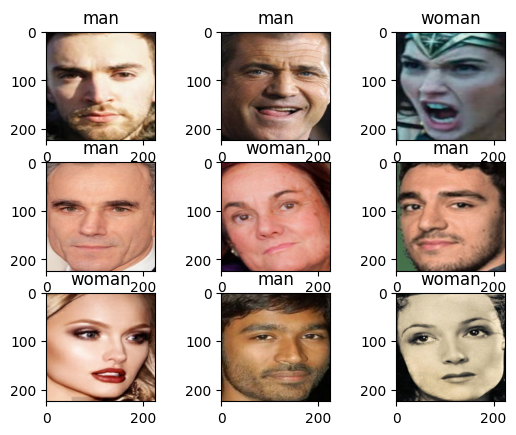

In [307]:
for image, label in train_data.take(1):
    
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.title(classes[label[i]])
        plt.imshow(image[i].numpy().astype("uint8"))
    

# Train

In [50]:
with tf.device("/GPU:0"):
    model.fit(train_data, epochs=10)

Epoch 1/10
59/59 [==============================] - 24s 300ms/step - loss: 6.9891 - accuracy: 0.7404
Epoch 2/10
59/59 [==============================] - 17s 287ms/step - loss: 0.2926 - accuracy: 0.8854
Epoch 3/10
59/59 [==============================] - 17s 286ms/step - loss: 0.2432 - accuracy: 0.9099
Epoch 4/10
59/59 [==============================] - 17s 286ms/step - loss: 0.1964 - accuracy: 0.9232
Epoch 5/10
59/59 [==============================] - 17s 286ms/step - loss: 0.1019 - accuracy: 0.9542
Epoch 6/10
59/59 [==============================] - 17s 286ms/step - loss: 0.0573 - accuracy: 0.9765
Epoch 7/10
59/59 [==============================] - 17s 287ms/step - loss: 0.0527 - accuracy: 0.9813
Epoch 8/10
59/59 [==============================] - 17s 287ms/step - loss: 0.0792 - accuracy: 0.9670
Epoch 9/10
59/59 [==============================] - 17s 287ms/step - loss: 0.0545 - accuracy: 0.9792
Epoch 10/10
59/59 [==============================] - 17s 289ms/step - loss: 0.0435 - accura

# Evaluate(Test)

In [51]:
model.evaluate(test_data)

15/15 [==============================] - 4s 141ms/step - loss: 0.5609 - accuracy: 0.8809


[0.5608811974525452, 0.8808510899543762]

# <center> <h1>  👨‍💻   🚀  